In [ ]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 3.5 MB/s 
     |████████████████████████████████| 1.0 MB 42.4 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 1.0 MB 38.9 MB/s 
     |████████████████████████████████| 11.2 MB 51.4 MB/s 
     |████████████████████████████████| 6.3 MB 47.4 MB/s 
     |████████████████████████████████| 16.7 MB 329 kB/s 
     |████████████████████████████████| 950 kB 42.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.0 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd 

roads = gpd.read_file('roads.shp')


In [ ]:
roads.head()

,FID,geometry
0,0,"LINESTRING (772416.393 6278333.963, 772394.776..."
1,1,"LINESTRING (772407.067 6279297.502, 772378.034..."
2,2,"LINESTRING (772259.974 6279306.948, 772251.873..."
3,3,"LINESTRING (772008.859 6278229.316, 771981.424..."
4,4,"LINESTRING (771970.937 6278225.553, 771954.002..."


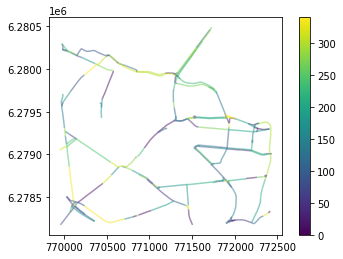

In [ ]:
ax = roads.plot(column='FID', alpha=0.5, edgecolor='k', legend=True)

# Convert shape file to graph file 

We use this module 

https://github.com/caesar0301/s2g

In [1]:
!pip install s2g 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 50.4 MB/s eta 0:00:00
  Created wheel for s2g: filename=s2g-0.2.6-py3-none-any.whl size=9875 sha256=cb140720c413f8dd7a63fee5a4c1a60657f32c03b34999350e424750b893f60d
  Stored in directory: /root/.cache/pip/wheels/a7/de/e7/8ca9976d1062fa8b2dc95a0a17947107ac17ed5fff9781606d
Successfully built s2g


In [8]:
# Now we want to convert shp file to python editable file

from s2g import ShapeGraph
import networkx as nx

sg = ShapeGraph(shapefile='roads_paris13.shp', to_graph=True)
assert isinstance(sg.graph, nx.Graph)

#The other way is designed for programmable usage or time-consuming process where intermediate data could be sniffed or saved. Here is an example to read lines with [fiona]:

from s2g import ShapeGraph
import fiona
from shapely.geometry import shape, LineString

shp = 'roads_paris13.shp'

with fiona.open(shp) as source:
    geoms = []
    for r in source:
        s = shape(r['geometry'])
        if isinstance(s, LineString):
            geoms.append(s)

# create ShapeGraph object from a list of lines
sg = ShapeGraph(geoms, to_graph=False)

# detect major components
mc = sg.gen_major_components()
# major components are mc[2]

# convert the largest component to networkx Graph
graph = sg.to_networkx()  # equivalently sg.graph

print('done')


100% (630 of 630) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (36 of 36) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 38% (240 of 630) |########              | Elapsed Time: 0:00:00 ETA:   0:00:00

Major components statistics:
	Total components: 1
	Component size: max 36, median 36.0, min 36, average 36.0
	Top comp. sizes: 36


100% (630 of 630) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (36 of 36) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Major components statistics:
	Total components: 1
	Component size: max 36, median 36.0, min 36, average 36.0
	Top comp. sizes: 36
done


<class 'networkx.classes.graph.Graph'>


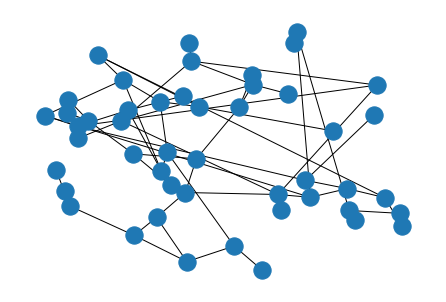

In [10]:
print(type(graph))

nx.draw(graph)

In [ ]:
#!pip install matplotlib==3.1.3

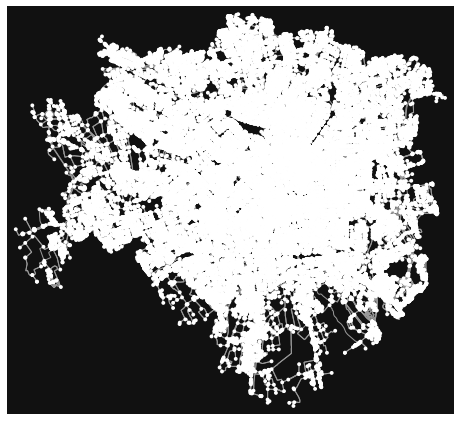

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'networkx.classes.reportviews.OutMultiEdgeDataView'>


In [ ]:
# first let us convert MultiDigraph into DiGraph 
# Specify the name that is used to seach for the data
import osmnx as ox
import networkx as nx

place_name = 'Mumbai, India'  # Fetch OSM street network from the location
graphcity = ox.graph_from_place(place_name)# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)# Plot the streets
fig, ax = ox.plot_graph(graphcity)
# compose graph from several graphs in the area


#save G graph into file 
print(type(graphcity))

nx.write_edgelist(graphcity, "edgescity.csv", delimiter=" ") # edges with attributes!!!

edgestrastevere = graphcity.edges.data()  # default data is {} (empty dict)

#print((edgestrastevere))
print(type(edgestrastevere))
#print(edgestrastevere[0])

# save edges data
#nx.write_shp(graphtrastevere, "graphtrastevere")

# you can similarly save it as a shapefile, if you prefer obsolete formats
ox.save_graph_geopackage(graphcity, filepath="graph_city.gpkg")


# save/load graph as a graphml file: this is the best way to save your model
# for subsequent work later
filepath = "graph_city.graphml"
ox.save_graphml(graphcity, filepath)

# save graph to further calculations on the graph
digraph = nx.DiGraph(graphcity)

In [ ]:

fig.savefig('mymilan.svg', format='svg', dpi=1200)

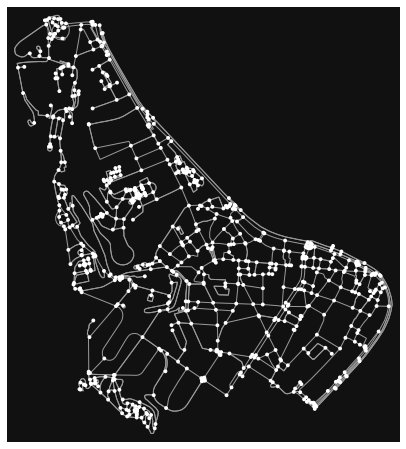

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'networkx.classes.reportviews.OutMultiEdgeDataView'>


In [ ]:
# first let us convert MultiDigraph into DiGraph 

# Specify the name that is used to seach for the data
import osmnx as ox
import networkx as nx

place_name = 'Trastevere, Rome, Italy'  # Fetch OSM street network from the location
graphcity = ox.graph_from_place(place_name)# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)# Plot the streets
fig, ax = ox.plot_graph(graphcity)
# compose graph from several graphs in the area


#save G graph into file 
print(type(graphcity))

nx.write_edgelist(graphcity, "trastevere_edgescity.csv", delimiter=" ") # edges with attributes!!!

edgestrastevere = graphcity.edges.data()  # default data is {} (empty dict)

#print((edgestrastevere))
print(type(edgestrastevere))
#print(edgestrastevere[0])

# save edges data
#nx.write_shp(graphtrastevere, "graphtrastevere")

# you can similarly save it as a shapefile, if you prefer obsolete formats
ox.save_graph_geopackage(graphcity, filepath="trasteveregraph_city.gpkg")


# save/load graph as a graphml file: this is the best way to save your model
# for subsequent work later
filepath = "trasteveregraph_city.graphml"
ox.save_graphml(graphcity, filepath)

# save graph to further calculations on the graph
digraph = nx.DiGraph(graphcity)

Load graph of a district


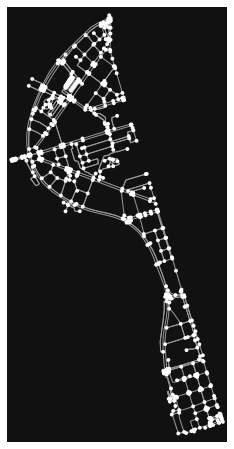

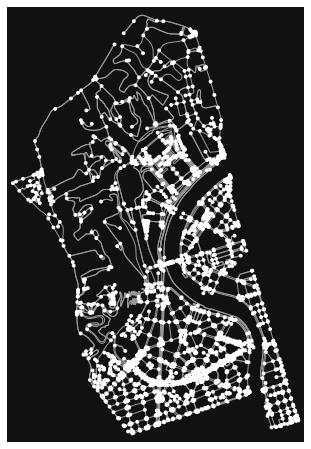

<class 'networkx.classes.multidigraph.MultiDiGraph'>
[(139109274, 4833572483, {'osmid': 28204400, 'lanes': '2', 'name': 'Via Domenico Alberto Azuni', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 8.044}), (139109274, 1123279837, {'osmid': 23920270, 'oneway': True, 'lanes': '4', 'name': 'Lungotevere delle Navi', 'highway': 'primary', 'maxspeed': '50', 'length': 9.846, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fb175eb85d0>}), (139109274, 1123268046, {'osmid': 24609456, 'oneway': True, 'lanes': '1', 'name': 'Ponte Giacomo Matteotti', 'highway': 'residential', 'maxspeed': '50', 'length': 9.355, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fb175eb8350>}), (243640690, 309838057, {'osmid': 25266248, 'oneway': True, 'lanes': '3', 'name': 'Ponte del Risorgimento', 'highway': 'tertiary', 'maxspeed': '50', 'length': 24.362}), (243640690, 2002081186, {'osmid': 30059073, 'oneway': True, 'lanes': '2', 'name': 'Lungotevere Flaminio',

In [ ]:
# first let us convert MultiDigraph into DiGraph 

# Specify the name that is used to seach for the data
import osmnx as ox
import networkx as nx

place_name = 'Quartiere I Flaminio, Rome, Italy'  # Fetch OSM street network from the location
graphtrastevere = ox.graph_from_place(place_name)# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)# Plot the streets
fig, ax = ox.plot_graph(graphtrastevere)
# compose graph from several graphs in the area

place_name = 'Quartiere XV Della Vittoria, Rome, Italy'  # Fetch OSM street network from the location
graph_second = ox.graph_from_place(place_name)


graph_combin = nx.compose(graphtrastevere, graph_second)
fig, ax = ox.plot_graph(graph_combin)


#save G graph into file 
print(type(graphtrastevere))

nx.write_edgelist(graphtrastevere, "edgescity.csv", delimiter=" ") # edges with attributes!!!

edgestrastevere = graphtrastevere.edges.data()  # default data is {} (empty dict)

print((edgestrastevere))
print(type(edgestrastevere))
#print(edgestrastevere[0])

# save edges data
#nx.write_shp(graphtrastevere, "graphtrastevere")

# you can similarly save it as a shapefile, if you prefer obsolete formats
ox.save_graph_geopackage(graphtrastevere, filepath="graph_city.gpkg")


# save/load graph as a graphml file: this is the best way to save your model
# for subsequent work later
filepath = "graph_city.graphml"
ox.save_graphml(graphtrastevere, filepath)


digraph = nx.DiGraph(graphtrastevere)

Check that all is loaded well

In [ ]:
#from libpysal import weights, examples
#from contextily import add_basemap
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas

# read in example data from a geopackage file. Geopackages
graph_read = geopandas.read_file("edgescity.csv", delimiter ="\ ")#("graph_trastevere.gpkg")
print('just for a check we can read the file we saved')

# construct the array of coordinates for the centroid
#coordinates = np.column_stack((graph_read.geometry.x, graph_read.geometry.y))


graph_read.head()

In [ ]:
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

Find a node 

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx

# 1. load a graph G (simple without any multigraph info) from edges of multigraph 
# save graph for the district
#graph_simple = nx.read_edgelist("to_from - Sheet1(1).csv")
#test for edges
edgeslist = digraph.edges()
#print(edgeslist)

# 2. make a loop through all nodes of a graph G

# 3. estimate source node on a graph, closest node to the tree in a graph 

#lat_t = 41.926776825725696 # quercia del Tasso
#lng_t = 12.465319456365874 #

#lat_t = 41.892181 # quercia COCO tree in garden
#lng_t = 12.464101 #41.892181, 12.464101 Botanical garden in Trastevere

#lat_t = 41.889333537600045 # Ficus ruminunculus
#lng_t = 12.484486203581358

#The oldest tree in Milan 
#lat_t = 45.45227 
#lng_t = 9.17994

# Trees ZKM Karlruhe 
lat_t = 49.0013472621064
lng_t = 8.383173867793062

center_point = lat_t, lng_t 
# find the nearest node to some point in a graph
center_node = ox.get_nearest_node(graphcity, center_point)
print('coordinates on graph ',center_node)

# 4. calculate shortest path between source node selected and all other nodes of the graph 

graph_simple = digraph

sourcenode = center_node        
weightarr = np.zeros((3, int(len(graph_simple.nodes()))))
print('number of nodes', len(graph_simple.nodes()))
ind = 0


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


coordinates on graph  14961487
number of nodes 45941


Shortest path betweenness centrality

We use networkx directed betweenness centrality. We generate and save file with betweenness calculated.

In [ ]:
nodeslist = digraph.nodes()
edgeslist = digraph.edges()
#print(edgeslist)
#print(nodeslist)


betweenn_edg = nx.edge_betweenness_centrality_subset(digraph, [center_node], nodeslist, normalized=False, weight=None)

print("estimated betweenness for edges")

estimated betweenness for edges


In [ ]:
import numpy as np
import csv

#betweenn_edg_arr = np.array(betweenn_edg)

#print(betweenn_edg.keys())

#print(type(betweenn_edg.keys()))
#print(betweenn_edg.values())

weights = np.array(betweenn_edg.values())

#df_weights = pd.DataFrame([weightarr], columns= ['s', 't', 'w'])

#np.savetxt("weights_edges.csv", weights.transpose(), delimiter=",")

#my_dict = {'1': 'aaa', '2': 'bbb', '3': 'ccc'}
with open('weights_edges_karlsruhe_tree.csv', 'w') as f:
    for key in betweenn_edg.keys():
        f.write("%s,%s\n"%(key,betweenn_edg[key]))